In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("seaborn")

In [2]:
negativo = pd.read_csv("../dados/output/classes-canneti-oliveira_t1.csv")
positivo = pd.read_csv("../dados/output/classes-braz_2017-gouveia_t2.csv")
display(positivo.head(3))
display(negativo.head(3))

,all_trees,class1,class2,class3,class4,class5,class6,class7,class8,class9,nao_comerc,proib_cort,trees_cut,trees_reman,trees_seeds
0,9813,981.000000,1508.000000,215.0,1117.0,2017.0,1515.0,976.0,345.0,1139.0,156.000000,17.000000,3701.000000,3210.000000,693
1,8442,2507.717332,1481.131874,203.0,530.0,1028.0,1387.0,517.8,245.0,544.8,169.251274,19.537149,2329.251752,1683.003463,570
2,9396,3031.381291,1950.423528,351.0,364.0,550.0,1145.0,1005.8,368.0,633.8,186.988529,22.180970,2630.308131,1115.124621,591


,all_trees,class1,class2,class3,class4,class5,class6,class7,class8,class9,nao_comerc,proib_cort,trees_cut,trees_reman,trees_seeds
0,9813,981.000000,1508.000000,215.0,1117.000000,2017.0,1515.0,976.0,345.0,1139.0,156.0,17.0,3701.0,3210.0,693
1,7584,1400.693234,1153.000000,411.0,622.306766,1437.0,1302.0,439.8,265.0,554.8,156.0,17.0,2264.0,2151.0,573
2,7584,1458.853681,1121.146319,478.0,465.000000,933.0,1334.0,809.8,343.0,642.8,156.0,17.0,2762.0,1534.0,611


In [14]:
positivo["sem_destino"] = positivo["all_trees"] - (positivo["trees_cut"] + positivo["trees_reman"] + positivo["trees_seeds"])
positivo["sem_destino"]

0     2209.000000
1     3859.744784
2     5059.567248
3     6252.818709
4     7193.059013
5     7953.260697
6     8710.363041
7     9477.212187
8    10195.085229
9    10993.992470
Name: sem_destino, dtype: float64

In [15]:
negativo["sem_destino"] = negativo["all_trees"] - (negativo["trees_cut"] + negativo["trees_reman"] + negativo["trees_seeds"])
negativo["sem_destino"]

0    2209.0
1    2596.0
2    2677.0
3    2734.0
4    2795.0
5    2709.0
6    2611.0
7    2567.0
8    2464.0
9    2393.0
Name: sem_destino, dtype: float64

In [3]:
positivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   all_trees    10 non-null     int64  
 1   class1       10 non-null     float64
 2   class2       10 non-null     float64
 3   class3       10 non-null     float64
 4   class4       10 non-null     float64
 5   class5       10 non-null     float64
 6   class6       10 non-null     float64
 7   class7       10 non-null     float64
 8   class8       10 non-null     float64
 9   class9       10 non-null     float64
 10  nao_comerc   10 non-null     float64
 11  proib_cort   10 non-null     float64
 12  trees_cut    10 non-null     float64
 13  trees_reman  10 non-null     float64
 14  trees_seeds  10 non-null     int64  
dtypes: float64(13), int64(2)
memory usage: 1.3 KB


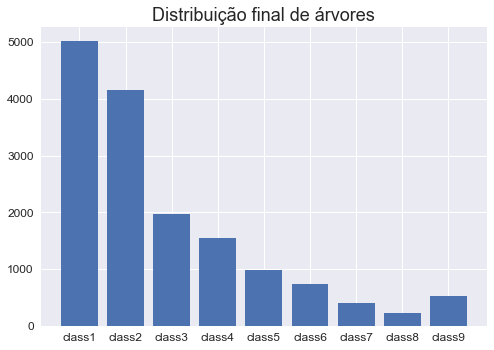

In [20]:
plt.bar(positivo.columns[1:10], positivo.loc[9,"class1":"class9"])
plt.title("Distribuição final de árvores", fontdict={"fontsize":18})
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("positivo-class-final.png")
plt.show()

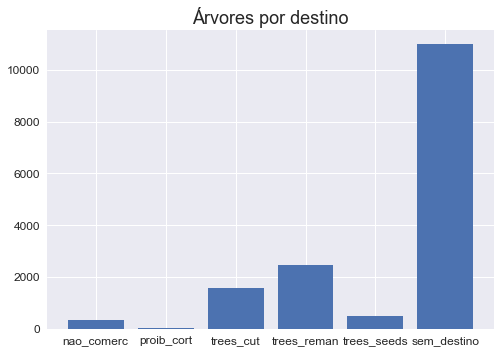

In [19]:
plt.bar(positivo.columns[10:], positivo.loc[9,"nao_comerc":])
plt.title("Árvores por destino", fontdict={"fontsize":18})
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("positivo-dest-final.png")
plt.show()

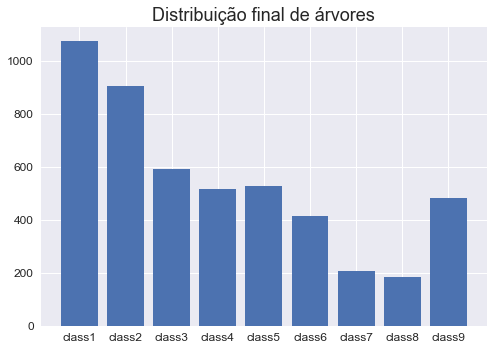

In [22]:
plt.bar(negativo.columns[1:10], negativo.loc[9,"class1":"class9"])
plt.title("Distribuição final de árvores", fontdict={"fontsize":18})
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("negavito-class-final.png")
plt.show()

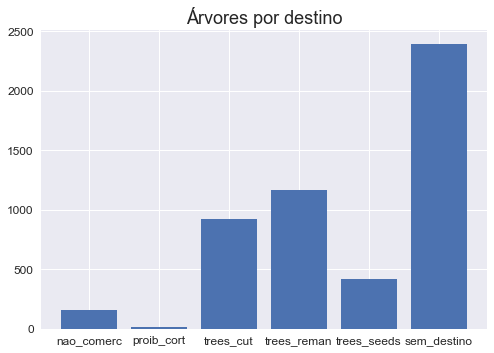

In [21]:
plt.bar(negativo.columns[10:], negativo.loc[9,"nao_comerc":])
plt.title("Árvores por destino", fontdict={"fontsize":18})
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("negavito-dest-final.png")
plt.show()

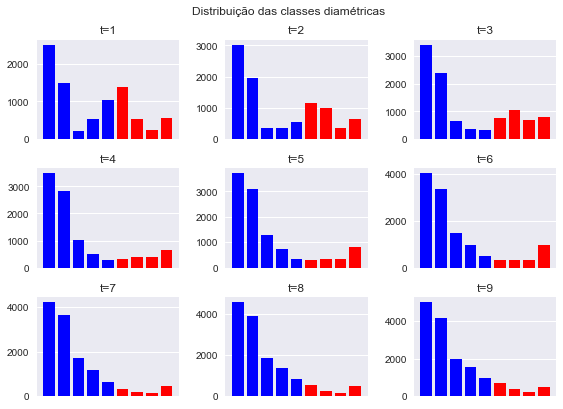

In [8]:
fig, ax = plt.subplots(3, 3)
fig.tight_layout(pad=1.0)
fig.suptitle("Distribuição das classes diamétricas", x = 0.5, y=1.05)
for row in range(1, 10):
    ax[(row-1)//3][(row-1)%3].bar(positivo.columns[1:10], positivo.loc[row,"class1":"class9"], color = ["blue"] *5 + ["red"] *4)
    ax[(row-1)//3][(row-1)%3].title.set_text(f't={row}')
    ax[(row-1)//3][(row-1)%3].get_xaxis().set_visible(False)
plt.savefig("positivo-dist-all.png")
plt.show()

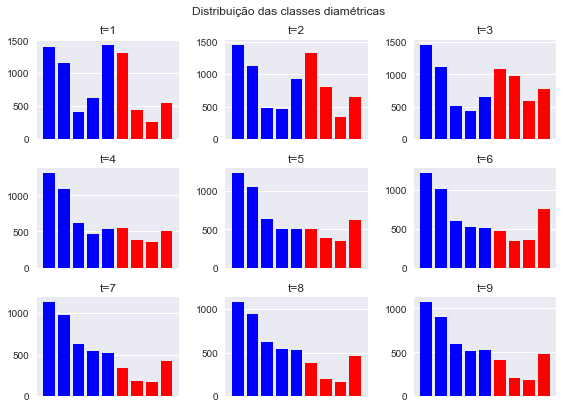

In [9]:
fig, ax = plt.subplots(3, 3)
fig.tight_layout(pad=1.0)
fig.suptitle("Distribuição das classes diamétricas", x = 0.5, y=1.05)
for row in range(1, 10):
    ax[(row-1)//3][(row-1)%3].bar(negativo.columns[1:10], negativo.loc[row,"class1":"class9"], color = ["blue"] *5 + ["red"] *4)
    ax[(row-1)//3][(row-1)%3].title.set_text(f't={row}')
    ax[(row-1)//3][(row-1)%3].get_xaxis().set_visible(False)
plt.savefig("negativo-dist-all.png")
plt.show()

In [26]:
pos_cuts = pd.read_csv("../dados/output/cuts-braz_2017-gouveia_t2.csv")
neg_cuts = pd.read_csv("../dados/output/cuts-canneti-oliveira_t1.csv")

In [27]:
pos_cuts.head()

,after,before,cut
0,7592.400000,9813,2220.600000
1,8850.725915,10458,1607.274085
2,11257.780623,12203,945.219377
3,15524.000000,nil,0.000000


In [28]:
neg_cuts.head()

,after,before,cut
0,7592.4,9813,2220.6
1,5805.6,7584,1778.4
2,4900.6,5803,902.4
3,4898.0,nil,0.0


In [31]:
neg_cuts.loc[3, "before"] = 4898.0
pos_cuts.loc[3, "before"] = 15524.0

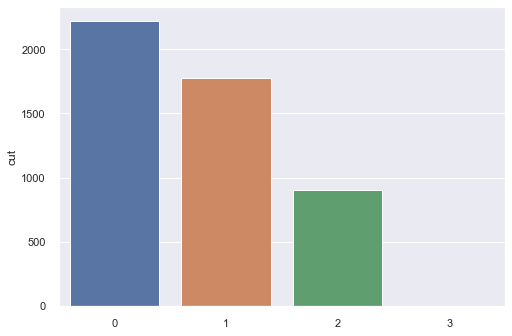

In [46]:
sns.set()
sns.barplot(y="cut", x=neg_cuts.index, data=neg_cuts)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2)
plt.bar(negativo.columns[1:10], negativo.loc[9,"class1":"class9"])
plt.suptitle("Distribuição final de árvores", fontdict={"fontsize":18})
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("negavito-class-final.png")
plt.show()